# Direct Comparison Control T0 v T2
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/S64F_gene_count.txt', index_col=18, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAS64F_001,611586,314216,328546,267945,135623,122556,169291,198632,113766,95446,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_002,575049,409669,243106,184948,187221,88068,124960,108400,116860,134805,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_003,824730,218574,321668,278746,92467,111493,152005,118341,80843,71644,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_004,858370,262758,351032,358769,109622,134079,175299,232638,115243,58507,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_005,828227,500390,312265,281623,228104,110909,158423,149446,154143,164299,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_006,882622,241947,252381,210988,113488,104409,103355,75316,88540,91730,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_007,698088,281983,336437,280200,118392,117157,164344,222087,105979,86190,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_008,695656,403657,227741,176757,183399,79146,98225,93109,120291,131636,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_009,656783,205008,214125,229070,97473,115874,111309,52115,74326,77237,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_010,992861,158438,381157,341457,70606,135710,161331,154493,49674,52146,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData_Mut.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAS64F_001,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_002,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_003,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_004,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_005,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_006,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_007,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_008,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_009,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control,T2,Y
MAFAS64F_005,Control,T2,Y
MAFAS64F_006,Control,T2,Y
MAFAS64F_007,Control,T1,Y
MAFAS64F_008,Control,T1,Y
MAFAS64F_009,Control,T1,Y
MAFAS64F_010,MAFA,T0,N


In [6]:
# split data set by timepoint
subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t1 = adata[adata.obs.time_point == 'T2']
#split by condition to remove control
subset_t0 = subset_t0[subset_t0.obs.condition == "Control"]
subset_t1 = subset_t1[subset_t1.obs.condition == "Control"]
subset_t1.obs['condition'] = subset_t1.obs['condition'].astype(str) + '_T2'
#rename T0 to control
#subset_t0.obs.condition = "Control"
#modify to add _wt/mut to condition to seperate
adata = ad.concat([subset_t0, subset_t1], axis=0)
adata.obs

/tmp/ipykernel_4396/1923461536.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset_t1.obs['condition'] = subset_t1.obs['condition'].astype(str) + '_T2'


,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control_T2,T2,Y
MAFAS64F_005,Control_T2,T2,Y
MAFAS64F_006,Control_T2,T2,Y


## Quality Control

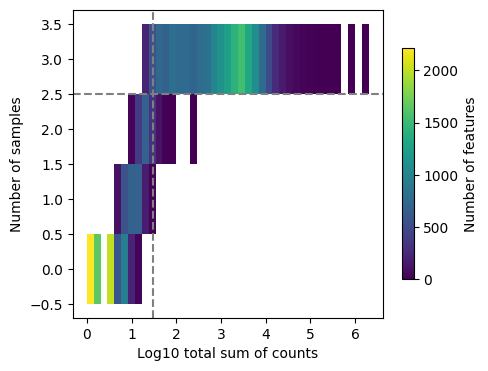

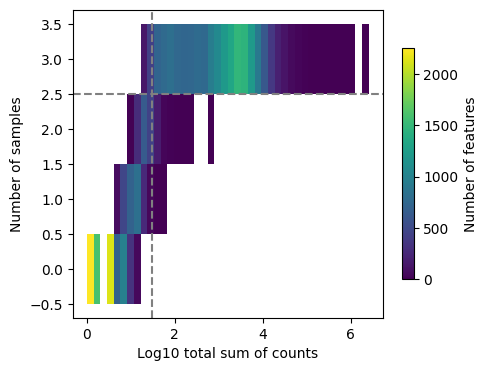

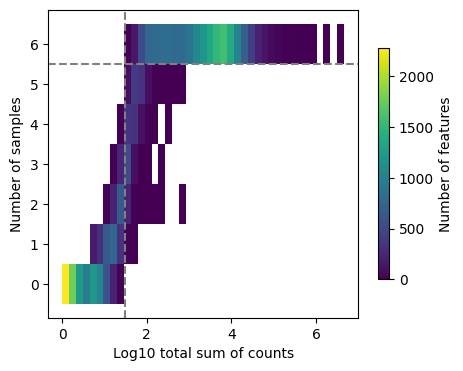

In [7]:
#check various filter points
dc.plot_filter_by_expr(subset_t0, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(subset_t1, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(adata, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15761

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 15761
    obs: 'condition', 'time_point', 'DOX'

In [10]:
#!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)
#adata.obs.condition

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.34 seconds.

Fitting dispersion trend curve...
... done in 4.11 seconds.

Fitting MAP dispersions...
... done in 22.89 seconds.

Fitting LFCs...
... done in 1.85 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'Control-T2', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition Control-T2 vs Control


... done in 0.90 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,756312.250000,0.211624,0.147617,1.433602,0.151686,0.820018
MT-CO1,322792.406250,-0.113952,0.407101,-0.279910,0.779547,0.984151
GCG,300759.937500,-0.112387,0.169538,-0.662901,0.507394,0.963342
INS,262321.218750,0.077816,0.221212,0.351772,0.725009,0.981908
MT-ND4,143525.640625,-0.091445,0.437913,-0.208820,0.834589,0.986884
...,...,...,...,...,...,...
ISX-AS1,17.828115,-0.399471,0.539818,-0.740011,0.459294,0.951812
CELA3B,18.351450,-0.151707,0.537769,-0.282105,0.777863,0.984151
KLK12,13.431407,-0.333464,0.551703,-0.604426,0.545560,0.967469


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_Control-T2_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition Control-T2 vs Control


... done in 5.33 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,756312.250000,2.593255,0.191688,1.433602,0.151686,0.820018
MT-CO1,322792.406250,2.235139,0.437929,-0.279910,0.779547,0.984151
GCG,300759.937500,-0.167211,0.273274,-0.662901,0.507394,0.963342
INS,262321.218750,0.627020,0.267205,0.351772,0.725009,0.981908
MT-ND4,143525.640625,1.904577,0.494736,-0.208820,0.834589,0.986884
...,...,...,...,...,...,...
ISX-AS1,17.828115,-0.003649,0.069942,-0.740011,0.459294,0.951812
CELA3B,18.351450,-0.001385,0.071731,-0.282105,0.777863,0.984151
KLK12,13.431407,-0.002915,0.070865,-0.604426,0.545560,0.967469


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,756312.250000,2.593255,0.191688,1.433602,0.151686,0.820018
MT-CO1,322792.406250,2.235139,0.437929,-0.279910,0.779547,0.984151
GCG,300759.937500,-0.167211,0.273274,-0.662901,0.507394,0.963342
INS,262321.218750,0.627020,0.267205,0.351772,0.725009,0.981908
MT-ND4,143525.640625,1.904577,0.494736,-0.208820,0.834589,0.986884
...,...,...,...,...,...,...
ISX-AS1,17.828115,-0.003649,0.069942,-0.740011,0.459294,0.951812
CELA3B,18.351450,-0.001385,0.071731,-0.282105,0.777863,0.984151
KLK12,13.431407,-0.002915,0.070865,-0.604426,0.545560,0.967469


In [19]:
#!pip install adjustText

In [20]:
#get the table of the top 20 pvalues from results_df
top_20_pvalues = results_df.sort_values('log2FoldChange', ascending=False).head(20)
top_20_pvalues

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
GFRA3,562.686829,3.175539,1.106446,3.733094,1.891419e-04,0.032054
IGFBP7,294.720215,2.655484,0.872735,3.837194,1.244482e-04,0.024518
CHGA,756312.250000,2.593255,0.191688,1.433602,1.516859e-01,0.820018
MT-CO1,322792.406250,2.235139,0.437929,-0.279910,7.795467e-01,0.984151
HAS3,85.835838,1.976845,0.521690,4.414591,1.012013e-05,0.004197
MT-ND4,143525.640625,1.904577,0.494736,-0.208820,8.345890e-01,0.986884
BHMT,146.130798,1.740594,0.481822,4.263586,2.011716e-05,0.006606
GPAT3,43.089191,1.509029,0.657322,3.284022,1.023369e-03,0.103393
TRAF5,69.695267,1.447977,0.517192,3.630250,2.831472e-04,0.042502


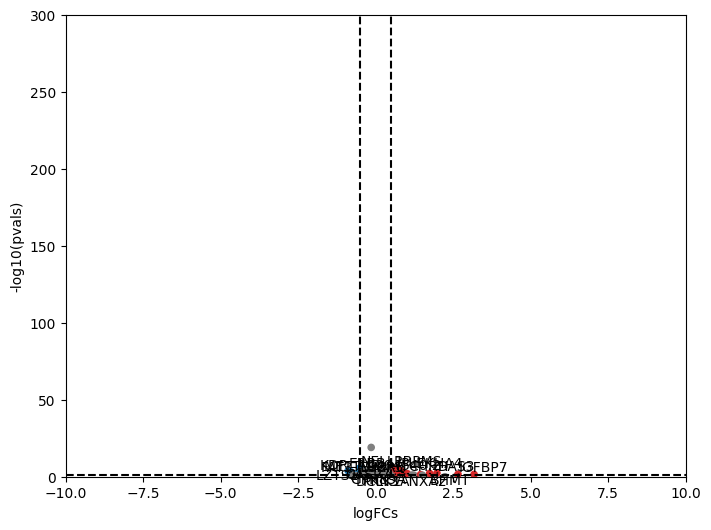

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
plt.savefig('../figures/direct/Control_MUT_02/volcano.png')

In [22]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,LINC00652,COL8A2,NOS3,RBP7,PTGER1,ISX-AS1,CELA3B,KLK12,TUSC8,LY6E-DT
treatment.vs.control,1.433602,-0.27991,-0.662901,0.351772,-0.20882,-0.144525,-0.718617,-0.071706,0.07171,-0.328924,...,1.137294,-1.158067,-0.284246,0.547026,-0.215545,-0.740011,-0.282105,-0.604426,-0.337575,0.807372


### Transcription factor activity inference

In [23]:
collectri = dc.get_collectri(organism='human')
collectri

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


# Filter new Table by the LFC and adjpvalue from DE table above

In [24]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
#make copy to make table from
table_tf_acts = tf_acts
table_tf_pvals = tf_pvals
table_tf_acts = table_tf_acts.rename(index={"treatment.vs.control": "TF_Activity"})
table_tf_pvals = table_tf_pvals.rename(index={"treatment.vs.control": "TF_pvalue"})
new_table = pd.concat([table_tf_acts, table_tf_pvals], axis = 0).T
#actual df
tf_acts

selected_rows = results_df.loc[[idx for idx in new_table.index if idx in results_df.index]]
selected_rows

# make selectable for various threshold values
Threshold_LFC = 0.1
Threshold_padj = 0.2
subset_lfc = selected_rows[abs(selected_rows["log2FoldChange"]) > Threshold_LFC]
subset_padj = subset_lfc[abs(subset_lfc["padj"]) < Threshold_padj]
subset_padj

#get TF data too
tf_data = new_table.loc[subset_padj.index]
tf_data
#merge into 1 for readability
complete_table = pd.merge(tf_data, subset_padj, left_index=True, right_index=True)
complete_table
#save
complete_table.to_csv('../figures/direct/Control_MUT_02/table_comparison_Control_MUT_02.csv')

Running ulm on mat with 1 samples and 15761 targets for 652 sources.


### Activity inference with Univariate Linear Model (ULM)

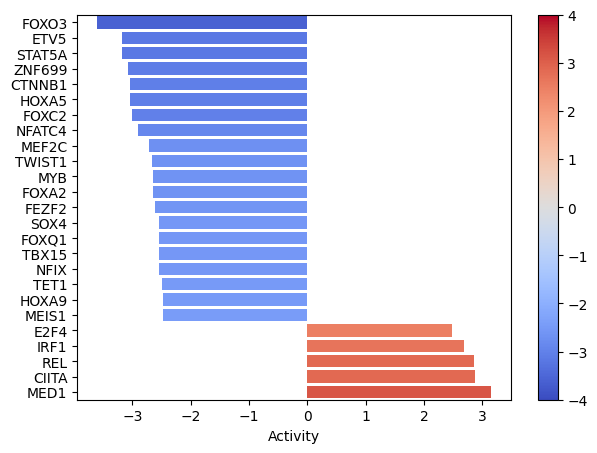

In [25]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/direct/Control_MUT_02/tf_activities.png'
)

In [26]:
abs_values = tf_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = tf_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='TFs', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/Control_MUT_02/top25_tfs.csv')
long_df

,TFs,value
1,FOXO3,-3.606358
2,ETV5,-3.18203
3,STAT5A,-3.174998
4,MED1,3.15532
5,ZNF699,-3.080324
6,CTNNB1,-3.047305
7,HOXA5,-3.034146
8,FOXC2,-3.00398
9,NFATC4,-2.8994
10,CIITA,2.872783


In [27]:
# dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,save='../figures/direct/Control_MUT_02/SIX1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,save='../figures/direct/Control_MUT_02/BCL11B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/direct/Control_MUT_02/MAFA_targets.png')
#

# Plot Networks

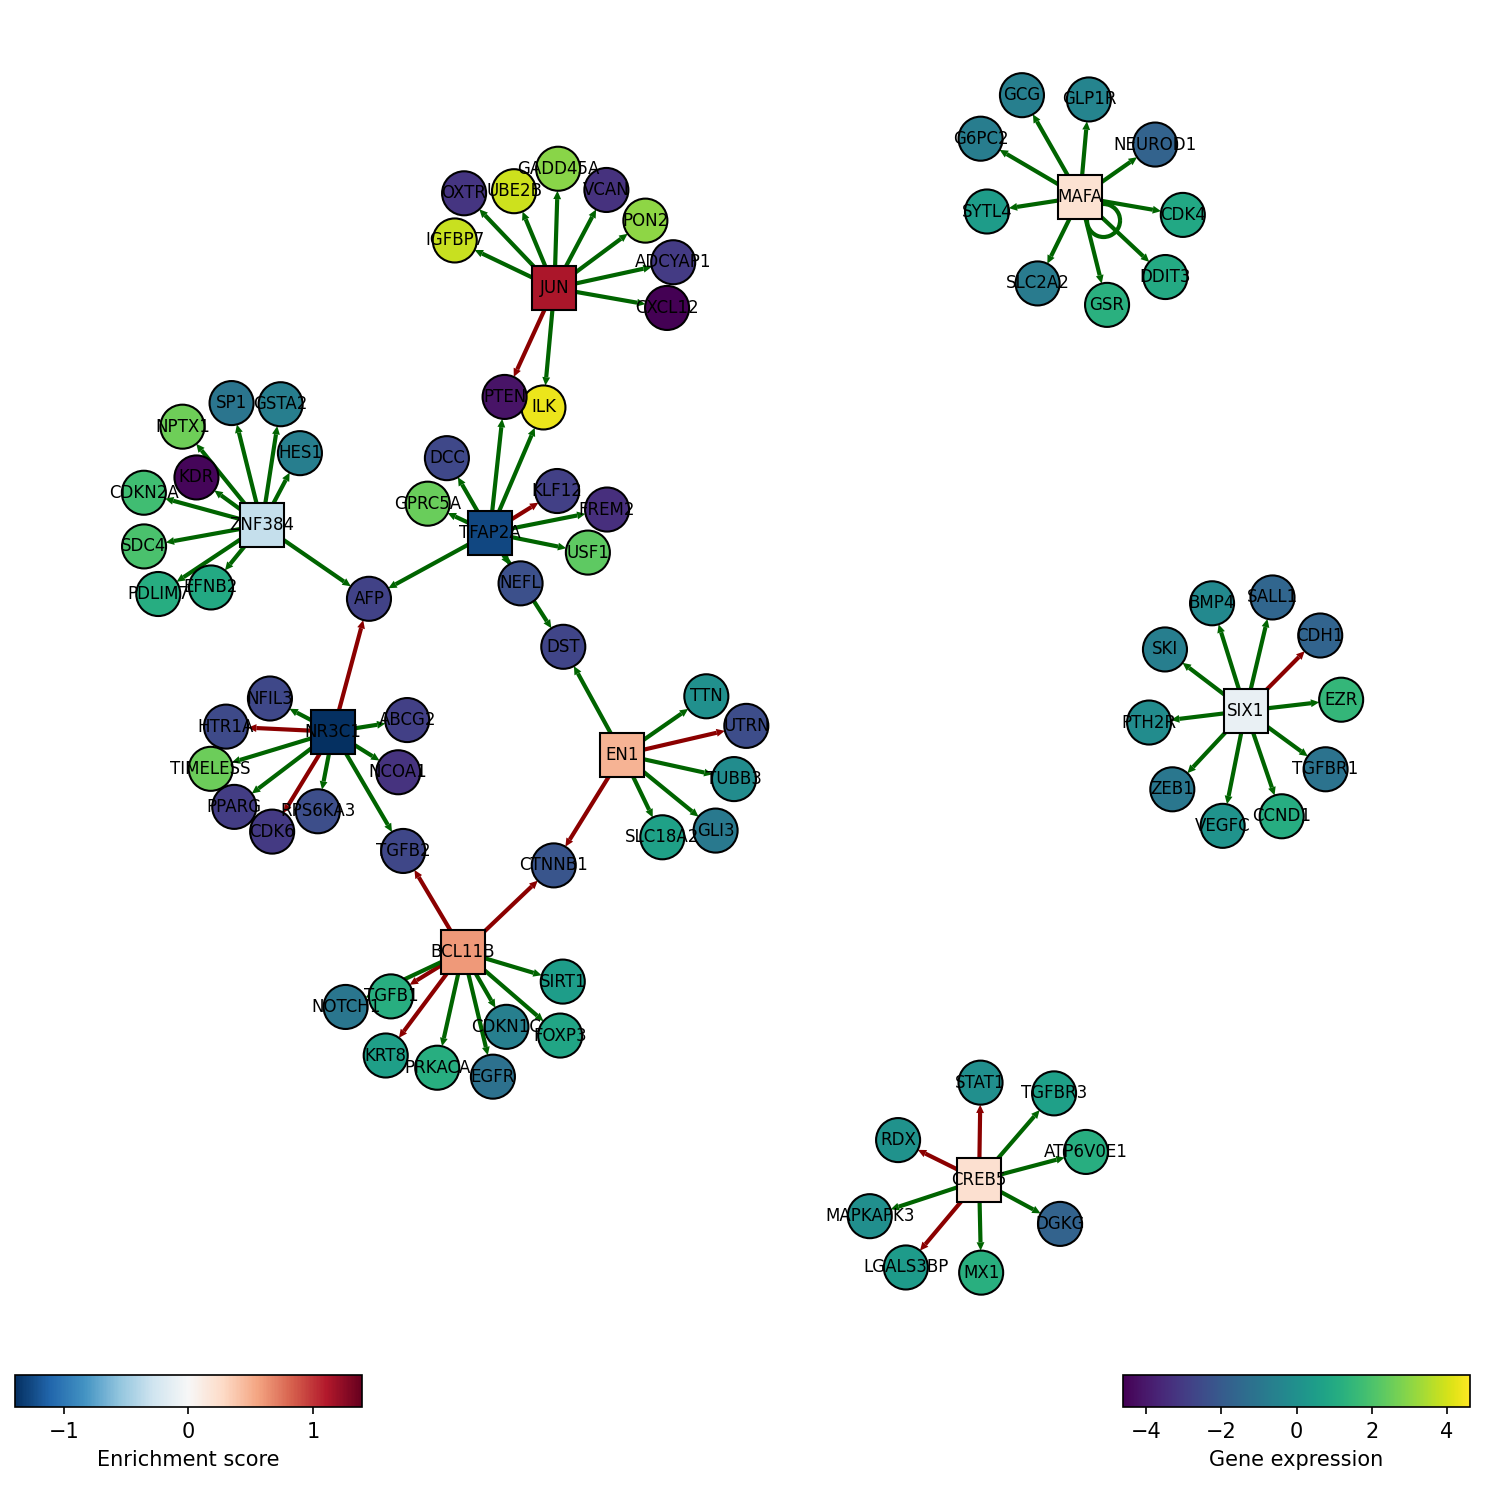

In [28]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['SIX1', 'BCL11B', 'EN1', 'CREB5', 'ZNF384', 'TFAP2A', 'NR3C1', 'JUN', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/direct/Control_MUT_02/plot_networks.png'
)

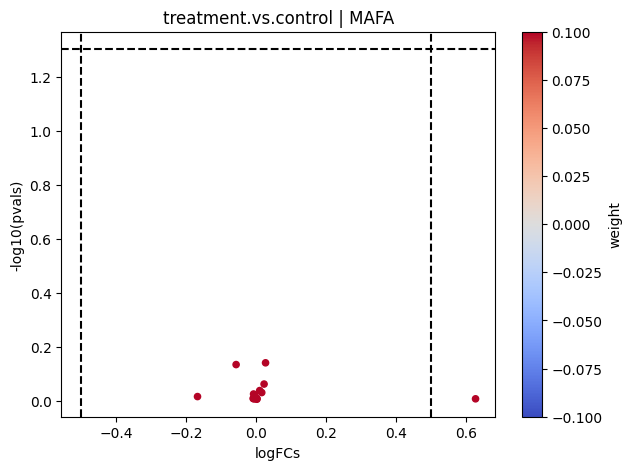

In [29]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [30]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [31]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 15761 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
treatment.vs.control,-2.706134,3.325178,-2.524694,0.388478,9.095067,-0.217277,-1.607708,-4.915667,-2.007071,3.120081,1.539802,1.258025,-2.219385,1.21708


In [32]:
abs_values = pathway_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = pathway_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='Pathways', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/Control_MUT_02/top25_pathways.csv')
long_df

,Pathways,value
1,JAK-STAT,9.095067
2,PI3K,-4.915667
3,EGFR,3.325178
4,TNFa,3.120081
5,Androgen,-2.706134
6,Estrogen,-2.524694
7,WNT,-2.219385
8,TGFb,-2.007071
9,NFkB,-1.607708
10,Trail,1.539802


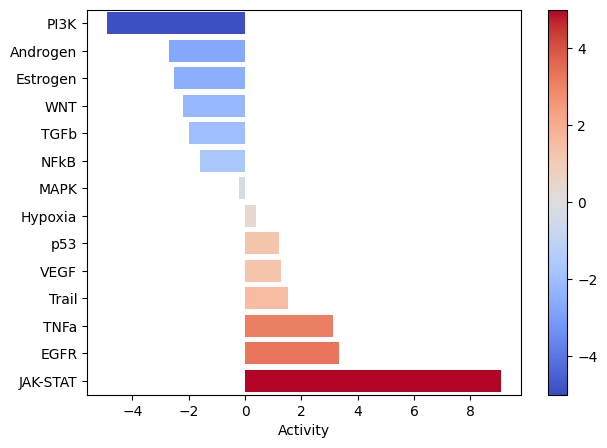

In [33]:
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    save='../figures/direct/Control_MUT_02/pathway_activities.png'
)

In [34]:
# dc.plot_targets(results_df, stat='stat', source_name='p53', net=progeny, top=30,save='../figures/direct/Control_MUT_02/p53_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='Androgen', net=progeny, top=20,save='../figures/direct/Control_MUT_02/Androgen_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=20, save='../figures/direct/Control_MUT_02/JAK-STAT_targets.png')

# Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [35]:
# # The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
# msigdb = dc.get_resource('MSigDB')
# msigdb

In [36]:
# msigdb['collection'].unique()

In [37]:
# # Filter by hallmark
# msigdb = msigdb[msigdb['collection']=='hallmark']

# # Remove duplicated entries
# msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# # Rename
# msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

# msigdb